# Custom Cde for Segmentation

mean_value  46.42398725935311
mode_value  2
median_value  48.0


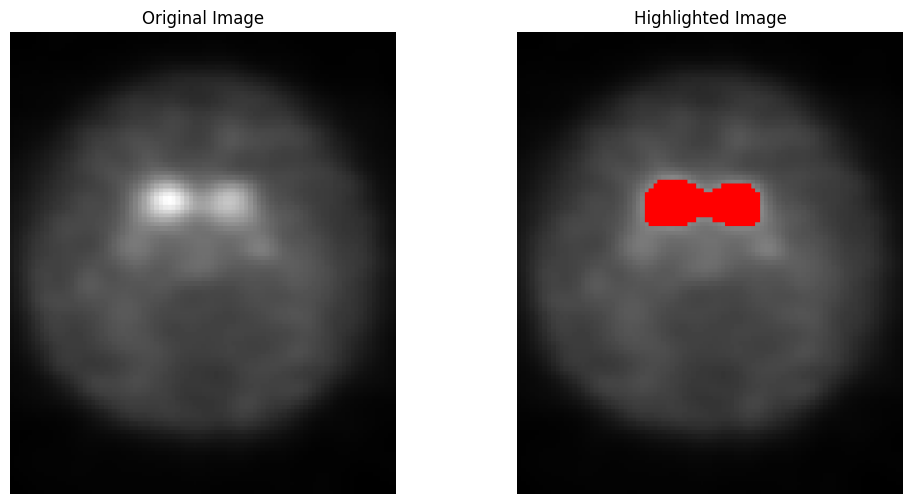

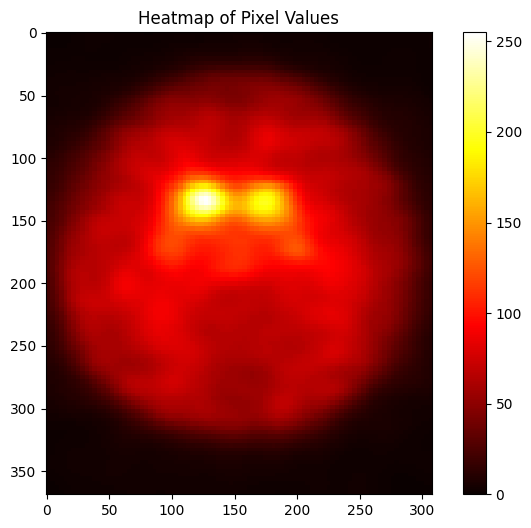

In [58]:
from PIL import Image, ImageDraw
import statistics
import matplotlib.pyplot as plt
import numpy as np

def get_pixel_clusters(image_path, threshold_value):
    img = Image.open(image_path)
    img = img.convert('L')  # Convert to grayscale
    
    width, height = img.size
    visited = set()
    clusters = []
    
    def is_valid(x, y):
        return 0 <= x < width and 0 <= y < height
    
    for x in range(width):
        for y in range(height):
            if (x, y) not in visited:
                if img.getpixel((x, y)) > threshold_value:
                    cluster = []
                    stack = [(x, y)]
                    while stack:
                        cx, cy = stack.pop()
                        if (cx, cy) not in visited and img.getpixel((cx, cy)) > threshold_value:
                            cluster.append((cx, cy))
                            visited.add((cx, cy))
                            for dx in [-1, 0, 1]:
                                for dy in [-1, 0, 1]:
                                    nx, ny = cx + dx, cy + dy
                                    if is_valid(nx, ny):
                                        stack.append((nx, ny))
                    if cluster:
                        clusters.append(cluster)
    
    return clusters

def highlight_clusters(image_path, clusters):
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    
    for cluster in clusters:
        for x, y in cluster:
            draw.point((x, y), fill="red")
    
    return img

def plot_heatmap(image_path):
    img = Image.open(image_path)
    img = img.convert('L')
    pixels = np.array(img)
    plt.figure(figsize=(8, 6))
    plt.imshow(pixels, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Heatmap of Pixel Values')
    plt.show()

# Example usage
image_path = r"B:\Sami Sir Research\Data set\pngimage\pd\3150_2012-11-02_14_02_58.0_slice37.png"
mean_value = statistics.mean(list(Image.open(image_path).convert('L').getdata()))
mode_value = statistics.mode(list(Image.open(image_path).convert('L').getdata()))
median_value = statistics.median(list(Image.open(image_path).convert('L').getdata()))
print('mean_value ', mean_value)
print('mode_value ', mode_value)
print('median_value ', median_value)
clusters = get_pixel_clusters(image_path, 135)
highlighted_img = highlight_clusters(image_path, clusters)

# Plot the original and highlighted images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(Image.open(image_path), cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(highlighted_img, cmap='gray')
axs[1].set_title('Highlighted Image')
axs[1].axis('off')

plt.show()
plot_heatmap(image_path)


# Code for saving slices in png

Saved axial slice 37 as PNG: output/hc\axial_slice_37.png


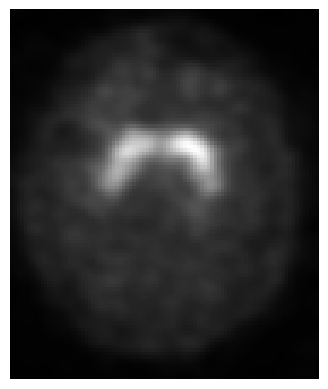

In [1]:
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt

def load_dicom_images(dicom_dir):
    # Get list of DICOM files in the directory
    dicom_files = sorted([os.path.join(dicom_dir, file) for file in os.listdir(dicom_dir) if file.endswith('.dcm')])
    try:
        # Read DICOM files and stack pixel arrays into a 3D array
        dicom_data = [pydicom.dcmread(file) for file in dicom_files]
        preprocessed_image_data = np.stack([dicom.pixel_array for dicom in dicom_data])
        # Remove single channel dimension if present
        preprocessed_image_data = np.squeeze(preprocessed_image_data)
        return preprocessed_image_data
    except Exception as e:
        print("Error loading DICOM data:", e)
        return None

def save_axial_slice_as_png(dicom_dir, output_dir, slice_number):
    # Load DICOM images
    dicom_images = load_dicom_images(dicom_dir)

    if dicom_images is not None:
        # Check if slice number is within bounds
        if 0 <= slice_number < dicom_images.shape[0]:
            # Save the axial slice as PNG
            output_filename = os.path.join(output_dir, f"axial_slice_{slice_number}.png")
            plt.imshow(dicom_images[slice_number, :, :], cmap='gray')
            plt.axis('off')
            plt.savefig(output_filename, bbox_inches='tight', pad_inches=0)
            print(f"Saved axial slice {slice_number} as PNG:", output_filename)
        else:
            print("Slice number is out of bounds.")
    else:
        print("Failed to load DICOM images.")

def main():
    # Directory containing the DICOM files
    dicom_dir = "B:/Sami Sir Research/Data set/hc/PPMI/3370/Reconstructed_DaTSCAN/2011-11-30_15_13_13.0/I339919"
    # Directory to save PNG files
    output_dir = "output/hc"

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Specify slice number to save
    slice_number = 37

    # Save the axial slice as PNG
    save_axial_slice_as_png(dicom_dir, output_dir, slice_number)

if __name__ == "__main__":
    main()


In [27]:
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt

def load_dicom_images(dicom_dir):
    # Get list of DICOM files in the directory
    dicom_files = sorted([os.path.join(dicom_dir, file) for file in os.listdir(dicom_dir) if file.endswith('.dcm')])
    try:
        # Read DICOM files and stack pixel arrays into a 3D array
        dicom_data = [pydicom.dcmread(file) for file in dicom_files]
        preprocessed_image_data = np.stack([dicom.pixel_array for dicom in dicom_data])
        # Remove single channel dimension if present
        preprocessed_image_data = np.squeeze(preprocessed_image_data)
        return preprocessed_image_data
    except Exception as e:
        print("Error loading DICOM data:", e)
        return None

def save_axial_slices_as_png(output_dir, patient_id, datscan_date, dicom_images):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save axial slices 37 to 44 as PNG
    for slice_number in range(37, 45):
        output_filename = f"{patient_id}_{datscan_date}_slice{slice_number}.png"
        output_path = os.path.join(output_dir, output_filename)
        if 0 <= slice_number < dicom_images.shape[0]:
            plt.imshow(dicom_images[slice_number, :, :], cmap='gray')
            plt.axis('off')
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()
            print(f"Saved axial slice {slice_number} as PNG:", output_path)
        else:
            print("Slice number is out of bounds.")

def traverse_directory(root_dir, output_dir):
    # Traverse the root directory
    for patient_id in os.listdir(root_dir):
        patient_dir = os.path.join(root_dir, patient_id)
        if os.path.isdir(patient_dir):
            # Inside each patient directory, look for Reconstructed_DaTSCAN directory
            reconstructed_datscan_dir = os.path.join(patient_dir, "Reconstructed_DaTSCAN")
            if os.path.isdir(reconstructed_datscan_dir):
                # Inside Reconstructed_DaTSCAN, look for date folders
                for date_folder in os.listdir(reconstructed_datscan_dir):
                    date_folder_path = os.path.join(reconstructed_datscan_dir, date_folder)
                    if os.path.isdir(date_folder_path):
                        # Inside each date folder, look for DATSCAN ID folders
                        for datscan_id_folder in os.listdir(date_folder_path):
                            datscan_id_folder_path = os.path.join(date_folder_path, datscan_id_folder)
                            if os.path.isdir(datscan_id_folder_path):
                                # Inside each DATSCAN ID folder, load DICOM images and save axial slices
                                dicom_images = load_dicom_images(datscan_id_folder_path)
                                if dicom_images is not None:
                                    save_axial_slices_as_png(output_dir, patient_id, date_folder, dicom_images)

def main():
    # Root directory containing patient folders
    root_dir = "B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)/PPMI"

    # Output directory to save PNG files
    output_dir = "B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)"

    # Traverse the directory and save axial slices for each DATSCAN ID folder
    traverse_directory(root_dir, output_dir)

if __name__ == "__main__":
    main()


Saved axial slice 37 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice37.png
Saved axial slice 38 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice38.png
Saved axial slice 39 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice39.png
Saved axial slice 40 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice40.png
Saved axial slice 41 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice41.png
Saved axial slice 42 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice42.png
Saved axial slice 43 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice43.png
Saved axial slice 44 as PNG: B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)\4100_2012-11-13_13_33_30.0_slice44.png
Saved ax

Enhanced grayscale image saved successfully.


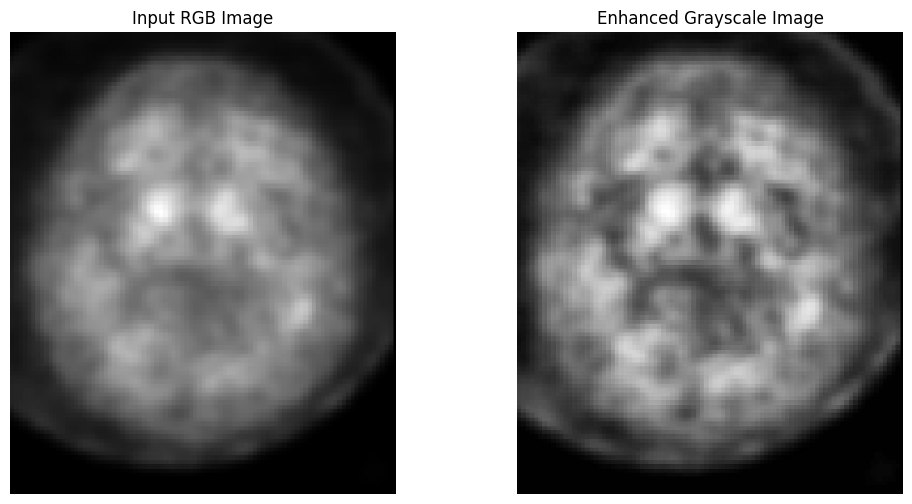

In [3]:
import cv2
import matplotlib.pyplot as plt

# Input image directory
input_img_dir = r"B:\Sami Sir Research\Data set\DAT_PRE-P_S-ID(4100-4478)\output_for_4100-4478\4107_2012-12-21_11_40_02.0_slice43.png"

# Read the input image
input_img = cv2.imread(input_img_dir)

# Create a copy of the input image for display
display_img = input_img.copy()

# Convert the image to grayscale
gray_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
cl = clahe.apply(gray_image)

# Output image directory
output_img_dir = r"D:\Research\UIU Grant\Visual Disorders\Progression\IDRID\IDRID\IDRID\Dataset\4\IDRiD_31CLAHE.jpg"

# Save the enhanced grayscale image
cv2.imwrite(output_img_dir, cl)

print("Enhanced grayscale image saved successfully.")

# Plot the input RGB image and the enhanced grayscale image
plt.figure(figsize=(12, 6))

# Plot the input RGB image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
plt.title("Input RGB Image")
plt.axis("off")

# Plot the enhanced grayscale image
plt.subplot(1, 2, 2)
plt.imshow(cl, cmap='gray')
plt.title("Enhanced Grayscale Image")
plt.axis("off")

plt.show()

In [5]:

def calculate_pixel_stats(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Convert image to grayscale for simplicity
    img = img.convert('L')
    
    # Get pixel data
    pixels = list(img.getdata())
    
    # Calculate lowest and highest pixel values
    lowest_pixel = min(pixels)
    highest_pixel = max(pixels)
    
    # Calculate average, mode, median, and RMS pixel values
    avg_pixel = sum(pixels) / len(pixels)
    mode_pixel = statistics.mode(pixels)
    median_pixel = statistics.median(pixels)
    rms_pixel = (sum((p - avg_pixel) ** 2 for p in pixels) / len(pixels)) ** 0.5
    
    return lowest_pixel, highest_pixel, avg_pixel, mode_pixel, median_pixel, rms_pixel

# Example usage
image_path = r"B:\Sami Sir Research\Data set\DAT_PRE-P_S-ID(4100-4478)\output_for_4100-4478\4107_2012-12-21_11_40_02.0_slice43.png"
lowest, highest, average, mode, median, rms = calculate_pixel_stats(image_path)
print("Lowest Pixel Value:", lowest)
print("Highest Pixel Value:", highest)
print("Average Pixel Value:", average)
print("Mode Pixel Value:", mode)
print("Median Pixel Value:", median)
print("RMS Pixel Value:", rms)


Lowest Pixel Value: 0
Highest Pixel Value: 255
Average Pixel Value: 78.3400556083483
Mode Pixel Value: 0
Median Pixel Value: 81.0
RMS Pixel Value: 58.5060098307262


In [6]:

def calculate_upper_quarter_stats(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Convert image to grayscale for simplicity
    img = img.convert('L')
    
    # Get pixel data
    pixels = list(img.getdata())
    
    # Calculate median pixel value
    median_pixel = statistics.median(pixels)
    
    # Filter pixels to keep only those in the upper quarter
    upper_quarter_pixels = [p for p in pixels if p >= median_pixel]
    
    # Calculate lowest and highest pixel values
    lowest_pixel = min(upper_quarter_pixels)
    highest_pixel = max(upper_quarter_pixels)
    
    # Calculate average, mode, median, and RMS pixel values
    avg_pixel = sum(upper_quarter_pixels) / len(upper_quarter_pixels)
    mode_pixel = statistics.mode(upper_quarter_pixels)
    median_pixel = statistics.median(upper_quarter_pixels)
    rms_pixel = (sum((p - avg_pixel) ** 2 for p in upper_quarter_pixels) / len(upper_quarter_pixels)) ** 0.5
    
    return lowest_pixel, highest_pixel, avg_pixel, mode_pixel, median_pixel, rms_pixel

# Example usage
image_path = r"B:\Sami Sir Research\Data set\DAT_PRE-P_S-ID(4100-4478)\output_for_4100-4478\4107_2012-12-21_11_40_02.0_slice43.png"
lowest, highest, average, mode, median, rms = calculate_upper_quarter_stats(image_path)
print("Lowest Pixel Value:", lowest)
print("Highest Pixel Value:", highest)
print("Average Pixel Value:", average)
print("Mode Pixel Value:", mode)
print("Median Pixel Value:", median)
print("RMS Pixel Value:", rms)


Lowest Pixel Value: 81
Highest Pixel Value: 255
Average Pixel Value: 129.90613894502124
Mode Pixel Value: 113
Median Pixel Value: 128.0
RMS Pixel Value: 30.009540871498885


## Standard Deviation of image pixels 

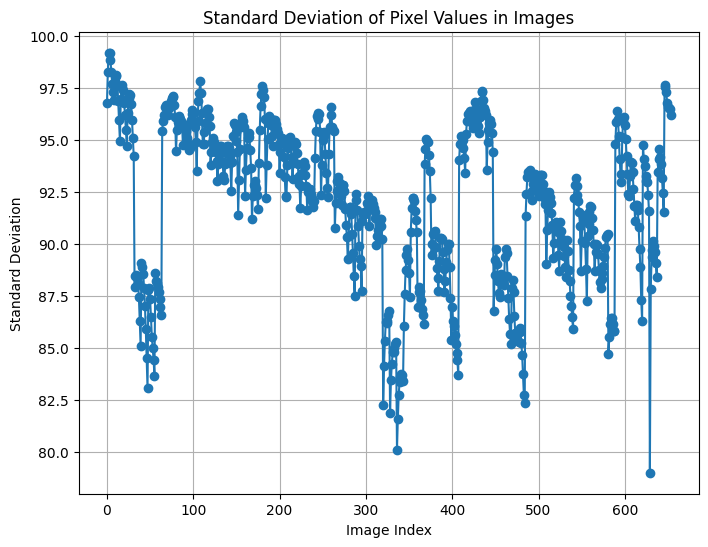

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing the images
image_path = "B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)/output_for_4100-4478/"

# Function to calculate standard deviation of pixel values in an image
def calculate_stddev(image_file):
    # Open the image
    image = Image.open(image_file)
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Calculate the standard deviation of pixel values
    stddev = np.std(image_array)
    return stddev

# List to store standard deviations
stddev_list = []

# Iterate over all images in the directory
for filename in os.listdir(image_path):
    if filename.endswith(".png"):
        image_file = os.path.join(image_path, filename)
        # Calculate standard deviation for the current image
        stddev = calculate_stddev(image_file)
        stddev_list.append(stddev)

# Plot the standard deviations
plt.figure(figsize=(8, 6))
plt.plot(stddev_list, marker='o', linestyle='-')
plt.title("Standard Deviation of Pixel Values in Images")
plt.xlabel("Image Index")
plt.ylabel("Standard Deviation")
plt.grid(True)
plt.show()


In [7]:
import numpy as np
from PIL import Image

# Path to the image file
image_file = "B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)/output_for_4100-4478/4106_2016-12-14_14_56_42.0_slice43.png"

# Open the image
image = Image.open(image_file)

# Convert the image to a NumPy array
image_array = np.array(image)

# Flatten the image array to convert it into a 1D array
flattened_image_array = image_array.flatten()

# Calculate the quartiles
q1 = np.percentile(flattened_image_array, 25)
q2 = np.percentile(flattened_image_array, 50)
q3 = np.percentile(flattened_image_array, 75)
q4 = np.percentile(flattened_image_array, 100)

print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile, Median):", q2)
print("Q3 (75th percentile):", q3)
print("Q4 (100th percentile, Maximum):", q4)


Q1 (25th percentile): 21.0
Q2 (50th percentile, Median): 80.0
Q3 (75th percentile): 255.0
Q4 (100th percentile, Maximum): 255.0


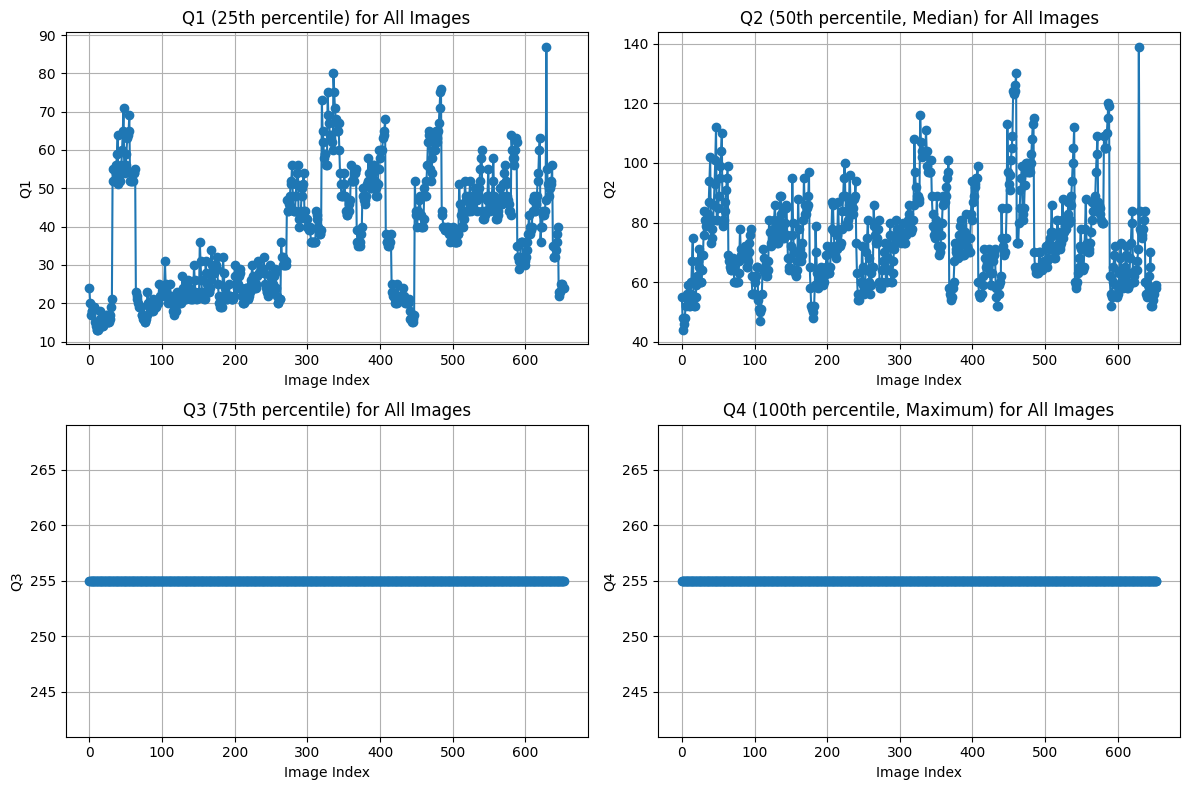

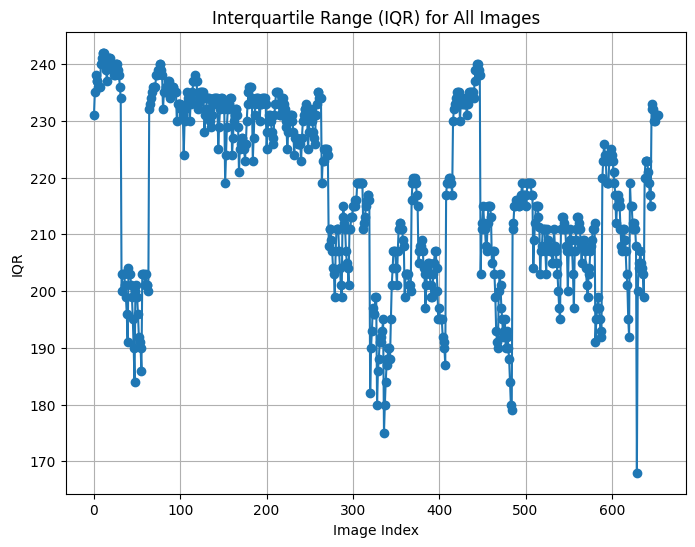

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing the images
image_path = "B:/Sami Sir Research/Data set/DAT_PRE-P_S-ID(4100-4478)/output_for_4100-4478/"

# Function to calculate quartiles for an image
def calculate_quartiles(image_file):
    # Open the image
    image = Image.open(image_file)
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Flatten the image array to convert it into a 1D array
    flattened_image_array = image_array.flatten()
    # Calculate the quartiles
    q1 = np.percentile(flattened_image_array, 25)
    q2 = np.percentile(flattened_image_array, 50)
    q3 = np.percentile(flattened_image_array, 75)
    q4 = np.percentile(flattened_image_array, 100)
    return q1, q2, q3, q4

# List to store quartiles for all images
q1_list = []
q2_list = []
q3_list = []
q4_list = []

# Iterate over all images in the directory
for filename in os.listdir(image_path):
    if filename.endswith(".png"):
        image_file = os.path.join(image_path, filename)
        # Calculate quartiles for the current image
        q1, q2, q3, q4 = calculate_quartiles(image_file)
        q1_list.append(q1)
        q2_list.append(q2)
        q3_list.append(q3)
        q4_list.append(q4)

# Plot the quartiles
plt.figure(figsize=(12, 8))

# Plot Q1 for all images
plt.subplot(2, 2, 1)
plt.plot(q1_list, marker='o', linestyle='-')
plt.title("Q1 (25th percentile) for All Images")
plt.xlabel("Image Index")
plt.ylabel("Q1")
plt.grid(True)

# Plot Q2 for all images
plt.subplot(2, 2, 2)
plt.plot(q2_list, marker='o', linestyle='-')
plt.title("Q2 (50th percentile, Median) for All Images")
plt.xlabel("Image Index")
plt.ylabel("Q2")
plt.grid(True)

# Plot Q3 for all images
plt.subplot(2, 2, 3)
plt.plot(q3_list, marker='o', linestyle='-')
plt.title("Q3 (75th percentile) for All Images")
plt.xlabel("Image Index")
plt.ylabel("Q3")
plt.grid(True)

# Plot Q4 for all images
plt.subplot(2, 2, 4)
plt.plot(q4_list, marker='o', linestyle='-')
plt.title("Q4 (100th percentile, Maximum) for All Images")
plt.xlabel("Image Index")
plt.ylabel("Q4")
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and plot interquartile range (IQR)
iqr_list = [q3 - q1 for q3, q1 in zip(q3_list, q1_list)]

plt.figure(figsize=(8, 6))
plt.plot(iqr_list, marker='o', linestyle='-')
plt.title("Interquartile Range (IQR) for All Images")
plt.xlabel("Image Index")
plt.ylabel("IQR")
plt.grid(True)
plt.show()
